In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams["font.size"] = 18
from matplotlib.ticker import FuncFormatter

In [2]:
# SIRモデルの微分方程式を定義
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]


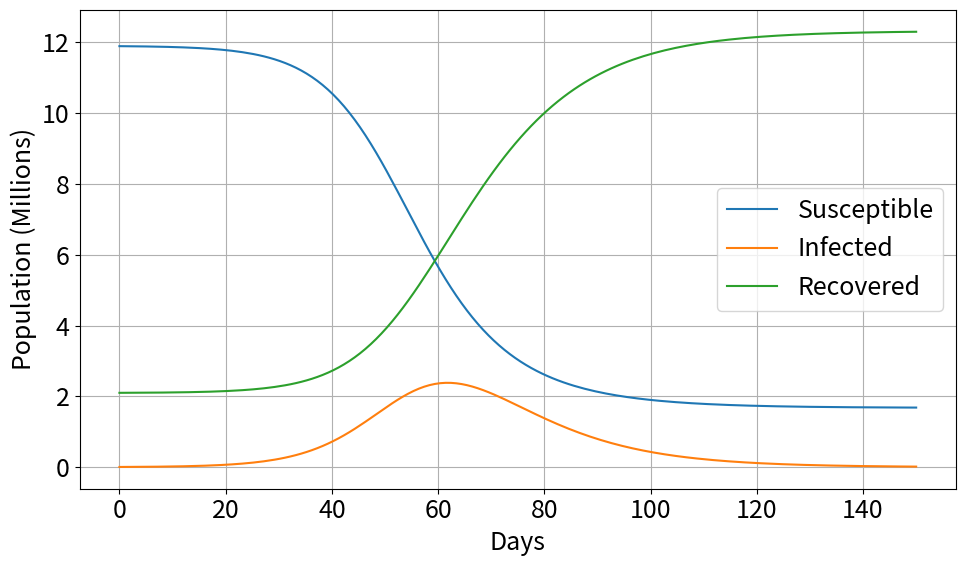

In [3]:
# 初期パラメータ
N = 1.4 * 10**7          # 総人口
I0 = 5288            # 初期感染者数
R0_val = N * 0.15             # 初期回復者数
S0 = N - I0 - R0_val   # 初期の感受性者数
gamma = 0.1        # 回復率
R0 = 2.28        # 基本再生産数
beta = R0 * gamma / S0  # 伝染率

days = 150         # シミュレーションの日数

# 初期条件と時間の設定
y0 = [S0, I0, R0_val]
t = np.linspace(0, days, days)

# odeintで微分方程式を解く
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

# グラフ作成
plt.figure(figsize=(10, 6))
plt.plot(t, S / 1e6, label='Susceptible')
plt.plot(t, I / 1e6, label='Infected')
plt.plot(t, R / 1e6, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population (Millions)')


# 縦軸にカンマ区切りを適用
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sir_model.pdf')
plt.show()

In [6]:
beta

1.916818162558286e-08

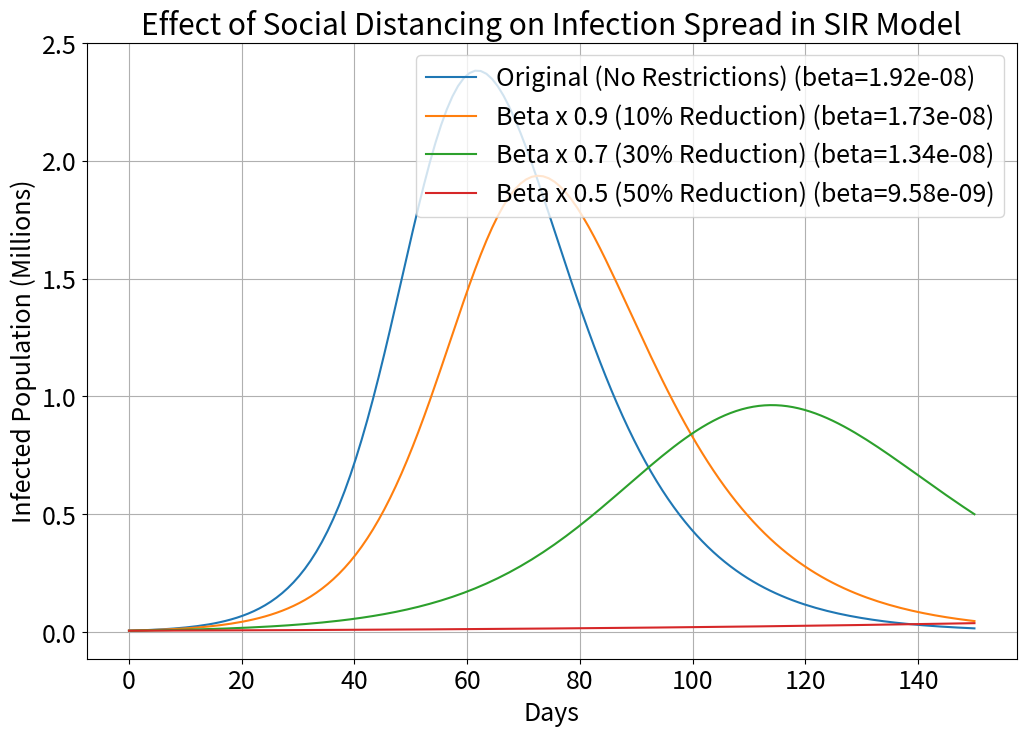

In [4]:
# 各自粛シナリオにおけるbetaの設定
scenarios = {
    "Original (No Restrictions)": beta,
    "Beta x 0.9 (10% Reduction)": beta * 0.9,
    "Beta x 0.7 (30% Reduction)": beta * 0.7,
    "Beta x 0.5 (50% Reduction)": beta * 0.5,
}

# グラフ作成
plt.figure(figsize=(12, 8))

# 各シナリオごとにSIRモデルをシミュレートしてプロット
for label, beta_adjusted in scenarios.items():
    # 初期条件
    y0 = [S0, I0, R0_val]
    # 微分方程式を解く
    solution = odeint(sir_model, y0, t, args=(beta_adjusted, gamma))
    S, I, R = solution.T
    # 感染者数 I のプロット
    plt.plot(t, I / 1e6, label=f'{label} (beta={beta_adjusted:.2e})')

# グラフ設定
plt.xlabel('Days')
plt.ylabel('Infected Population (Millions)')
plt.title('Effect of Social Distancing on Infection Spread in SIR Model')
plt.legend()
plt.grid(True)
plt.show()

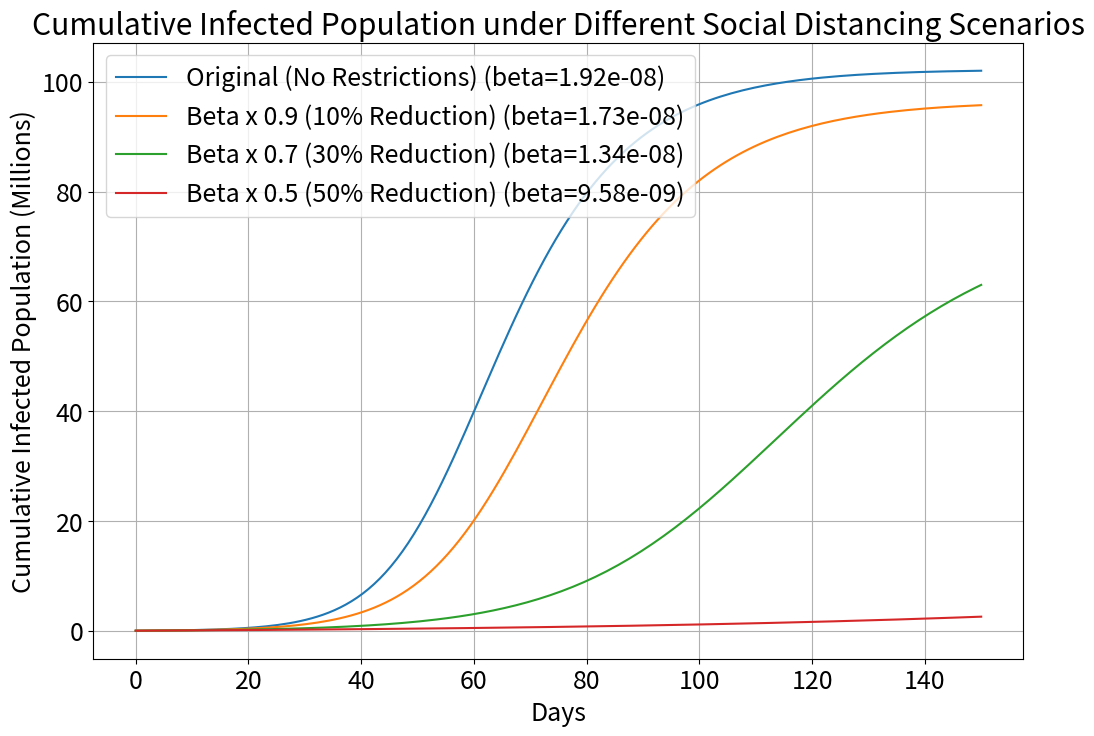

In [5]:
# グラフ作成
plt.figure(figsize=(12, 8))

# 各シナリオごとにSIRモデルをシミュレートしてプロット
for label, beta_adjusted in scenarios.items():
    # 初期条件
    y0 = [S0, I0, R0_val]
    # 微分方程式を解く
    solution = odeint(sir_model, y0, t, args=(beta_adjusted, gamma))
    S, I, R = solution.T
    # 累積感染者数（累積和を取る）
    cumulative_I = np.cumsum(I) * (t[1] - t[0])  # 時間間隔で積分近似
    plt.plot(t, cumulative_I / 1e6, label=f'{label} (beta={beta_adjusted:.2e})')

# グラフ設定
plt.xlabel('Days')
plt.ylabel('Cumulative Infected Population (Millions)')
plt.title('Cumulative Infected Population under Different Social Distancing Scenarios')
plt.legend()
plt.grid(True)
plt.show()